# Capstone Presentation
You're ready to put into practice everything you've learned so far.

First: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

Second: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

So, here is the deliverable: Prepare a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

* A specified research question your model addresses
* How you chose your model specification and what alternatives you compared it to
* The practical uses of your model for an audience of interest
* Any weak points or shortcomings of your model

This presentation is not a drill. You'll be presenting this slide deck live to a group as the culmination of your work in the last two supervised learning units. As a secondary matter, your slides and / or the Jupyter notebook you use or adapt them into should be worthy of inclusion as examples of your work product when applying to jobs.

Good luck!

# Dataset Information:

This database once contained 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the [Cleveland database](https://www.kaggle.com/ronitf/heart-disease-uci) is the only one that has been used by ML researchers to  this date. The "target" field refers to the presence of heart disease in the patient. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (value 1) from absence (value 0). 

The names and social security numbers of the patients were recently removed from the database. 

### Source:

### Acknowledgements

##### Creators: 
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

##### Donor: 
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779


See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.



[data](https://www.kaggle.com/ronitf/heart-disease-uci)


[data_full](https://archive.ics.uci.edu/ml/datasets/heart%2BDisease)

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.utils import resample
#from imblearn.over_sampling import SMOTENC
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedShuffleSplit

import warnings 
warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
heart = pd.read_csv('heart_disease.csv')
heart.columns = ['age','sex','chest_pain','resting_bp',
                 'serum_chol','fasting_bs','resting_ecg',
                 'max_hr','ex_ang','st_depress',
                 'slope_st_depress','num_mv', 'thalassemia','target']
heart = heart.dropna()
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
age                 303 non-null int64
sex                 303 non-null int64
chest_pain          303 non-null int64
resting_bp          303 non-null int64
serum_chol          303 non-null int64
fasting_bs          303 non-null int64
resting_ecg         303 non-null int64
max_hr              303 non-null int64
ex_ang              303 non-null int64
st_depress          303 non-null float64
slope_st_depress    303 non-null int64
num_mv              303 non-null int64
thalassemia         303 non-null int64
target              303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.5 KB
None


# Exploration of Data

In [3]:
#print(heart.head())
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
age                 303 non-null int64
sex                 303 non-null int64
chest_pain          303 non-null int64
resting_bp          303 non-null int64
serum_chol          303 non-null int64
fasting_bs          303 non-null int64
resting_ecg         303 non-null int64
max_hr              303 non-null int64
ex_ang              303 non-null int64
st_depress          303 non-null float64
slope_st_depress    303 non-null int64
num_mv              303 non-null int64
thalassemia         303 non-null int64
target              303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.5 KB
None


## Feature Information: 
1. age = age 
2. sex = sex 
3. chest_pain = chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain,4 = asymptomatic ) 
4. resting_bp = resting blood pressure 
5. serum_chol = serum cholesterol in mg/dl 
6. fasting_bp = fasting blood sugar > 120 mg/dl
7. resting_ecg = resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria )
8. max_hr = maximum heart rate achieved 
9. ex_ang = exercise induced angina (binary, 1 = yes) 
10. st_depress = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (values 0-3) colored by fluoroscopy
13. thalassemia = thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)
14. target = presence of heart disease (binary, 1 = present)


* Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion.

* ST depression refers to a finding on an electrocardiogram wherein the trace in the ST segment is abnormally low below the baseline.

* Thalassemia is an inherited blood disorder characterized by less hemoglobin and fewer red blood cells in your body than normal. Hemoglobin is the substance in your red blood cells that allows them to carry oxygen. The low hemoglobin and fewer red blood cells of thalassemia may cause anemia, leaving you fatigued. If you have mild thalassemia, you may not need treatment. But if you have a more severe form of the disorder, you may need regular blood transfusions. You can also take steps on your own to cope with fatigue, such as choosing a healthy diet and exercising regularly.

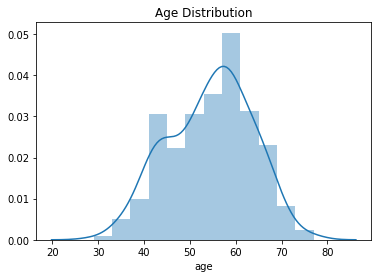

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


<Figure size 432x288 with 0 Axes>

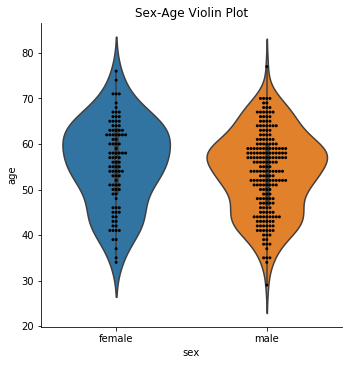

Male Age
 count    207.000000
mean      53.758454
std        8.883803
min       29.000000
25%       47.000000
50%       54.000000
75%       59.500000
max       77.000000
Name: age, dtype: float64

Female Age
 count    96.000000
mean     55.677083
std       9.409396
min      34.000000
25%      49.750000
50%      57.000000
75%      63.000000
max      76.000000
Name: age, dtype: float64


In [4]:
plt.figure()
sns.distplot(heart.age)
plt.title("Age Distribution")
plt.show()
print(heart.age.describe())

plt.figure()
g = sns.catplot(x='sex',y='age',data=heart,kind='violin')
sns.swarmplot(x='sex', y='age', color="k", size=3, data=heart, ax=g.ax)
plt.title("Sex-Age Violin Plot")
g.set_xticklabels(labels=['female','male'])
plt.show()


print('Male Age\n', heart['age'][heart.sex==1].describe())
print('\nFemale Age\n',heart['age'][heart.sex==0].describe())


We see that our age demographic is skewed to older indoviduals with a mean of 54 and we have double the male observations than female observations.

# Feature engineering

Based on the correlation of our variables, we might be able to find some meaningful features to fit our model with!

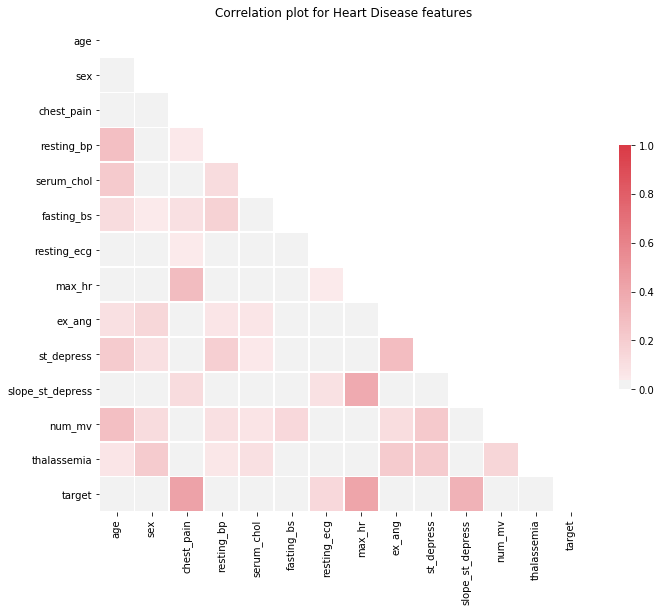

In [5]:
corr = heart.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0, vmax=1, mask=mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation plot for Heart Disease features")
plt.show()

Looking at the top-most correlated features for the "target" feature, lets make a feature that accentuates these variables.

In [6]:
heart['f1'] = (heart.chest_pain * heart.resting_ecg * 
               heart.max_hr * heart.slope_st_depress)

## Making Dummies

Despite the fact that chest_pain, resting_ecg, and thalassemia are all type int64, they are really categorical in nature so we should make dummies out of them to better the machine learning for our model.

In [7]:
print(heart[['chest_pain','resting_ecg','thalassemia']].describe())

       chest_pain  resting_ecg  thalassemia
count  303.000000   303.000000   303.000000
mean     0.966997     0.528053     2.313531
std      1.032052     0.525860     0.612277
min      0.000000     0.000000     0.000000
25%      0.000000     0.000000     2.000000
50%      1.000000     1.000000     2.000000
75%      2.000000     1.000000     3.000000
max      3.000000     2.000000     3.000000


In [8]:
heart_dum = heart

# Convert the numeric (but acutally catergorical) to srtings
def chest_pain_types(series):
    if series == 1:
        return "typical_angina"
    elif series == 2:
        return "atypical_angina"
    elif series == 3:
        return "non_anginal_pain"
    elif series == 4:
        return "asymptomatic"

heart_dum['chest_types'] = heart['chest_pain'].apply(chest_pain_types)

def thalassemia_types(series):
    if series == 3:
        return "thal_norm"
    elif series == 6:
        return "thal_fixed"
    elif series == 7:
        return "thal_reversable"

heart_dum['thal_types'] = heart['thalassemia'].apply(thalassemia_types)

def ecg_types(series):
    if series == 0:
        return "ecg_norm"
    elif series == 1:
        return "ecg_wave_abnormal"
    elif series == 2:
        return "ecg_hypertrophy"

heart_dum['ecg_types'] = heart['resting_ecg'].apply(ecg_types)

# Concat dummies back into the dataframe
heart_dum = pd.concat([heart_dum,pd.get_dummies(heart_dum['chest_types'])], axis=1)
heart_dum = pd.concat([heart_dum,pd.get_dummies(heart_dum['thal_types'])], axis=1)
heart_dum = pd.concat([heart_dum,pd.get_dummies(heart_dum['ecg_types'])], axis=1)

#Ensure all new columns are numeric 'int64'
columns = ['atypical_angina', 'non_anginal_pain', 'typical_angina', 
           'thal_norm', 'ecg_hypertrophy', 'ecg_norm', 'ecg_wave_abnormal']
for column in columns:
    heart_dum[column] = heart_dum[column].astype('int64')

    # Drop original columns to avoid confusion/overfiting
heart_dum = heart_dum.drop(['chest_types','thal_types','ecg_types'],axis=1)
heart_dum = heart_dum.drop(['chest_pain','thalassemia','resting_ecg'],axis=1)

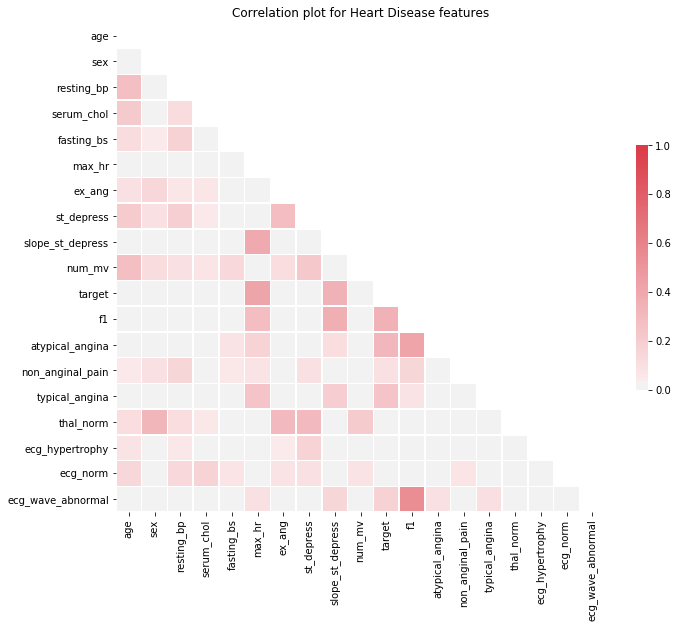

In [9]:
corr = heart_dum.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0, vmax=1, mask=mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation plot for Heart Disease features")
plt.show()

In [10]:
heart_sel = heart_dum[['typical_angina','non_anginal_pain','atypical_angina','f1','slope_st_depress','max_hr','ecg_wave_abnormal','target']]

# Examination of non-tuned models

In [11]:
#Too avoid noise/over-fitting
X = heart_sel.drop('target',axis=1)
y = heart_sel['target']

# Initiate train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1,stratify=y)

# Scaling X to ease learning
scaler = preprocessing.StandardScaler().fit(X_train) #try Normalizer too
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Spot Check Algorithms
models = []
models.append(('NBB', BernoulliNB()))
models.append(('RFC', ensemble.RandomForestClassifier()))
models.append(('KNN', neighbors.KNeighborsClassifier()))
models.append(('DTC', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('GBC', ensemble.GradientBoostingClassifier()))
models.append(('ABC', ensemble.AdaBoostClassifier()))
models.append(('ETC', ensemble.ExtraTreesClassifier()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
# evaluate each model in turn
results = []
ac_results = []
names = []
for name, model in models:
    split = StratifiedShuffleSplit(n_splits=10, random_state=1337)
    #split = KFold(n_splits=10, random_state=1337)
    model = model.fit(X_train,y_train)
    acc_results = model.score(X_test,y_test)
    cv_results = cross_val_score(model, X_test, y_test, cv=split, scoring='accuracy')
    #cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    ac_results.append(acc_results)
    names.append(name)
    msg = "%s: %f (%f) %f" % (name, cv_results.mean(), cv_results.std(), acc_results)
    #msg = "%s: %f" % (name, acc_results)
    print(msg)

NBB: 0.725000 (0.175000) 0.774194
RFC: 0.700000 (0.187083) 0.741935
KNN: 0.900000 (0.122474) 0.870968
DTC: 0.675000 (0.160078) 0.677419
GNB: 0.775000 (0.207666) 0.741935
SVC: 0.850000 (0.122474) 0.741935
GBC: 0.700000 (0.187083) 0.741935
ABC: 0.700000 (0.187083) 0.709677
ETC: 0.750000 (0.223607) 0.741935
QDA: 0.650000 (0.200000) 0.741935


Above we see that the K Nearest Neighbors model yields the highest cross validation score; let's see if we can do any parameter tuning to achieve better than the non-tuned model.

In [13]:
print('Processing...')

start_time = time.time()

# Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         neighbors.KNeighborsClassifier())

split = StratifiedShuffleSplit(n_splits=10, random_state=1337)

# Declare hyperparameters to tune
hyperparameters = { 'kneighborsclassifier__n_neighbors' : [1,2,3,4,5,6,7,8,9,10],
                  'kneighborsclassifier__weights' : ['uniform', 'distance'],
                  'kneighborsclassifier__p': [1,2],
                  'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] 
                  }
 
# Tune model using cross-validation pipeline
knn = GridSearchCV(estimator=pipeline,param_grid=hyperparameters, cv=split)
knn.fit(X_train, y_train)

t= round((time.time() - start_time),4)
print("\n -- %s seconds for model fit --" % t)
                                                    
start_time = time.time()
                                                    
# Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)
print('Best Parameters:\n ', knn.best_params_)
print('Refit: ', knn.refit)
 
# Evaluate model pipeline on test data
print('\nTraining Accuracy:\n   ', knn.score(X_train, y_train))
print('Testing Accuracy:\n   ', knn.score(X_test, y_test))

score = cross_val_score(knn, X_test, y_test, cv=split)
print('\nCross Validation:\n    %0.2f +/- %0.2f' %(score.mean(),score.std()))
#print('MSE:\n ',mean_squared_error(y_test, y_pred))

t= round((time.time() - start_time),4)
print("\n -- %s seconds for results--" % t)

Processing...

 -- 5.3565 seconds for model fit --
Best Parameters:
  {'kneighborsclassifier__algorithm': 'ball_tree', 'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Refit:  True

Training Accuracy:
    0.8198529411764706
Testing Accuracy:
    0.8064516129032258

Cross Validation:
    0.78 +/- 0.07

 -- 39.1553 seconds for results--


Great, now let's try out the best parameters identified in the cell above

In [14]:
start_time = time.time()

# Instantiate our model and store it in a new variable, then fit it.
knn = neighbors.KNeighborsClassifier(n_neighbors=3,weights='uniform',p=1,algorithm='ball_tree')
knn.fit(X_train, y_train)

print('--KNN Model Results--')
score = cross_val_score(knn, X_test, y_test, cv=split, scoring='accuracy')
print("\nCross Validation:\n    %0.2f (+/- %0.2f)" % (score.mean(), score.std()))
print(score)

print('\nTraining Accuracy:\n   ', knn.score(X_train, y_train))
print('Testing Accuracy:\n   ', knn.score(X_test, y_test))

t= round((time.time() - start_time),4)
print("\n- %s seconds -" % t)

--KNN Model Results--

Cross Validation:
    0.80 (+/- 0.15)
[1.   0.75 0.75 0.5  0.75 0.75 1.   1.   0.75 0.75]

Training Accuracy:
    0.8198529411764706
Testing Accuracy:
    0.8064516129032258

- 0.0344 seconds -


The above is pretty disappointing, especially considering that the non-tuned model showed a cross valudation score of 0.90, when here we are getting a 0.80. Let's see if we can replicate the 0.90 score with the defaults.

In [15]:
start_time = time.time()

# Instantiate our model and store it in a new variable, then fit it.
knn = neighbors.KNeighborsClassifier(n_neighbors=5,weights='uniform',p=2,algorithm='auto')
knn.fit(X_train, y_train)

score = cross_val_score(knn, X_test, y_test, cv=split, scoring='accuracy')
print("\nCross Validation:\n    %0.2f (+/- %0.2f)" % (score.mean(), score.std()))
print(score)

print('--KNN Model Results--\n')
print('Training Accuracy:\n   ', knn.score(X_train, y_train))
print('Testing Accuracy:\n   ', knn.score(X_test, y_test))

t= round((time.time() - start_time),4)
print("\n- %s seconds -" % t)


Cross Validation:
    0.90 (+/- 0.12)
[1.   0.75 1.   1.   0.75 0.75 1.   1.   0.75 1.  ]
--KNN Model Results--

Training Accuracy:
    0.8051470588235294
Testing Accuracy:
    0.8709677419354839

- 0.0367 seconds -


Oddly enough, it seems the default paramters actually yield the highest cross validation score!

Since K Nearest Neighbors doesn't support feature importance, we will run the ensemble Gradient Boosting model to best estimate our most important features. We'll start with a grid search to identify the best parameters:

In [18]:
print('Processing...')

start_time = time.time()

# Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         ensemble.GradientBoostingClassifier())

split = StratifiedShuffleSplit(n_splits=10, random_state=1337)

# Declare hyperparameters to tune
hyperparameters = {'gradientboostingclassifier__n_estimators' : [100,500,1000,2000],
                  'gradientboostingclassifier__max_depth' : [1,2,3,4,5,6],
                  'gradientboostingclassifier__max_features': [1,2,3,4,5,6],
                  'gradientboostingclassifier__loss': ['deviance', 'exponential'],
                  'gradientboostingclassifier__random_state': [1337],
                  'gradientboostingclassifier__warm_start': [True],
                  'gradientboostingclassifier__n_iter_no_change' : [None, 1]
                  }
 
# Tune model using cross-validation pipeline
gbc = GridSearchCV(estimator=pipeline,param_grid=hyperparameters, cv=split)
gbc.fit(X_train, y_train)

t= round((time.time() - start_time),4)
print("\n -- %s seconds for model fit --" % t)
                                                    
start_time = time.time()
                                                    
# Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)
print('Best Parameters:\n ', gbc.best_params_)
print('Refit: ', gbc.refit)
 
# Evaluate model pipeline on test data
print('\nTraining Accuracy:\n   ', gbc.score(X_train, y_train))
print('Testing Accuracy:\n   ', gbc.score(X_test, y_test))

#score = cross_val_score(knn, X_test, y_test, cv=split)
#print('\nCross Validation:\n    %0.2f +/- %0.2f' %(score.mean(),score.std()))
#print('MSE:\n ',mean_squared_error(y_test, y_pred))

t= round((time.time() - start_time),4)
print("\n -- %s seconds for results--" % t)

Processing...

 -- 1198.166 seconds for model fit --
Best Parameters:
  {'gradientboostingclassifier__loss': 'exponential', 'gradientboostingclassifier__max_depth': 6, 'gradientboostingclassifier__max_features': 4, 'gradientboostingclassifier__n_estimators': 100, 'gradientboostingclassifier__n_iter_no_change': 1, 'gradientboostingclassifier__random_state': 1337, 'gradientboostingclassifier__warm_start': True}
Refit:  True

Training Accuracy:
    0.8786764705882353
Testing Accuracy:
    0.7741935483870968

 -- 0.0018 seconds for results--


Now we'll fit the model with the ideintified parameters:

In [24]:
start_time = time.time()

# Initialize and fit our forrest of trees
gbc = ensemble.GradientBoostingClassifier(loss='exponential',
                                          max_depth=6,max_features=4,
                                          n_estimators=100,
                                          n_iter_no_change=1 ,
                                          random_state=1337,
                                          warm_start=True)
gbc = gbc.fit(X_train, y_train)

print('--Random Forest Model Results--')
print('Training Accuracy:\n   ', gbc.score(X_train, y_train))
print('Testing Accuracy:\n   ', gbc.score(X_test, y_test))

score = cross_val_score(gbc, X_test, y_test, cv=split,scoring='accuracy')
print('\nCross Validation:\n    %0.2f +/- %0.2f' %(score.mean(),score.std()))

t= round((time.time() - start_time),4)
print("\n- %s seconds -" % t)

--Random Forest Model Results--
Training Accuracy:
    0.8786764705882353
Testing Accuracy:
    0.7741935483870968

Cross Validation:
    0.72 +/- 0.13

- 0.073 seconds -


And get our most important variables:

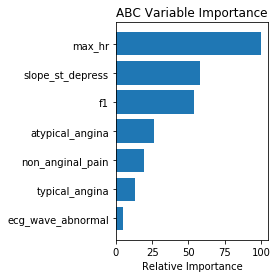

In [25]:
feature_importance = gbc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('ABC Variable Importance')
plt.show()

Looks like max_hr is our most important variable by a significant margin, followed by slope_st_depress, and our engineered feature f1!

In [16]:
#attempted without scaling X
#attempted class balancing on "sex"
#attempted heart_dum without selecting specific features
#attempted heart without creating dumming or selecting specific features
#attempted scaling X before train/test split

In [17]:
#conclusion, more data, obstacles

In [ ]:
for classifier use only model.score(X_test,y_test)
for regressor use model.score and mse
compare dummifying the categorical features